# encore_21_titanic

### Dataset Description  
passengerid: 탑승자 아이디  
survived:0=사망, 1=생존  
pclass: 1=1등석, 2=2등석, 3=3등석  
name: 탑승자 이름  
gender:male=남성, female=여성  
age: 나이  
sibsp: 타이타닉 호에 동승한 자매/배우자의 수  
parch: 타이타닉 호에 동승한 부모/자식의 수  
ticket: 티켓 번호  
fare: 승객 요금  
cabin: 방 호수  
embarked: 탑승지; C=셰르부르, Q=퀴즈타운, S=사우샘프턴  

### Import Library

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

### Global Variables

In [2]:
import easydict
import json
args = easydict.EasyDict()

# path 정보
args.default_path = '/Users/jaynam/workspace/playdata/encore21titanic/'
args.train_csv = args.default_path+'train.csv'
args.test_csv = args.default_path+'test.csv'
args.submission_csv = args.default_path+"submission.csv"

# 데이터 분석을 위한 변수들
args.random_state = 21

### Get Train and Test Dataset

In [3]:
org_train = pd.read_csv(args.train_csv)
org_test = pd.read_csv(args.test_csv)

In [4]:
print("org_train shape : ", org_train.shape)
print("org_test shape  : ", org_test.shape)

org_train shape :  (916, 12)
org_test shape  :  (393, 11)


In [5]:
submission = pd.read_csv(args.submission_csv)
print(submission.shape)
submission.head()

(393, 2)


,passengerid,survived
0,916,0.5
1,917,0.5
2,918,0.5
3,919,0.5
4,920,0.5


### Check Dataset Info

In [6]:
org_train.shape, org_test.shape

((916, 12), (393, 11))

train 과 test 의 컬럼 수가 1 차이남  

test 에는 survived 컬럼이 없음

In [7]:
org_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 916 entries, 0 to 915
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   passengerid  916 non-null    int64  
 1   survived     916 non-null    int64  
 2   pclass       916 non-null    int64  
 3   name         916 non-null    object 
 4   gender       916 non-null    object 
 5   age          736 non-null    float64
 6   sibsp        916 non-null    int64  
 7   parch        916 non-null    int64  
 8   ticket       916 non-null    object 
 9   fare         916 non-null    float64
 10  cabin        198 non-null    object 
 11  embarked     915 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 86.0+ KB


In [8]:
org_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 393 entries, 0 to 392
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   passengerid  393 non-null    int64  
 1   pclass       393 non-null    int64  
 2   name         393 non-null    object 
 3   gender       393 non-null    object 
 4   age          310 non-null    float64
 5   sibsp        393 non-null    int64  
 6   parch        393 non-null    int64  
 7   ticket       393 non-null    object 
 8   fare         392 non-null    float64
 9   cabin        97 non-null     object 
 10  embarked     392 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 33.9+ KB


### Check unique for 'passengerid' column

In [11]:
org_train['passengerid'].nunique(), org_train.shape

(916, (916, 12))

### Missing Value Check

##### org_train heatmap

<AxesSubplot:>

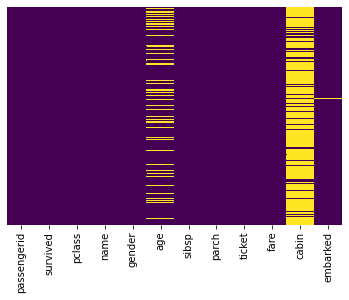

In [12]:
# org_train
sns.heatmap(org_train.isnull(), yticklabels = False, cbar = False, cmap = 'viridis')

##### org_test heatmap

<AxesSubplot:>

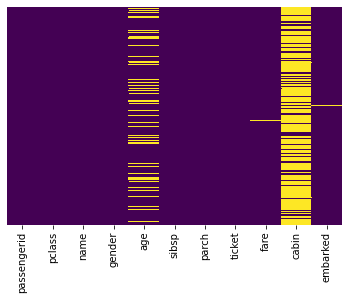

In [13]:
# org_test
sns.heatmap(org_test.isnull(), yticklabels = False, cbar = False, cmap = 'viridis')

##### org_train null check

In [14]:
org_train.isnull().sum()

passengerid      0
survived         0
pclass           0
name             0
gender           0
age            180
sibsp            0
parch            0
ticket           0
fare             0
cabin          718
embarked         1
dtype: int64

In [16]:
(org_train.isnull().sum() / org_train.shape[0]).sort_values(ascending=False)

cabin          0.783843
age            0.196507
embarked       0.001092
passengerid    0.000000
survived       0.000000
pclass         0.000000
name           0.000000
gender         0.000000
sibsp          0.000000
parch          0.000000
ticket         0.000000
fare           0.000000
dtype: float64

##### org_test null check

In [18]:
org_test.isnull().sum()

passengerid      0
pclass           0
name             0
gender           0
age             83
sibsp            0
parch            0
ticket           0
fare             1
cabin          296
embarked         1
dtype: int64

In [19]:
(org_test.isnull().sum() / org_test.shape[0]).sort_values(ascending=False)

cabin          0.753181
age            0.211196
fare           0.002545
embarked       0.002545
passengerid    0.000000
pclass         0.000000
name           0.000000
gender         0.000000
sibsp          0.000000
parch          0.000000
ticket         0.000000
dtype: float64

### Filling Missing Value

In [20]:
age_mean = org_train['age'].mean()
age_mean

29.69836956521739

### Drop column

In [10]:
drop_train = org_train.drop(['cabin'],axis =1)
drop_test = org_test.drop(['cabin'],axis =1)

### Fill na

##### age

In [15]:
age_mean = train['age'].median()
age_mean

28.0

In [16]:
train['age'] = train['age'].fillna(age_mean)
test['age'] = test['age'].fillna(age_mean)

In [17]:
train.isnull().sum()

passengerid    0
survived       0
pclass         0
name           0
gender         0
age            0
sibsp          0
parch          0
ticket         0
fare           0
embarked       1
dtype: int64

##### embarked

In [18]:
embarked_mode = train['embarked'].mode().values[0]
embarked_mode

'S'

In [19]:
train['embarked'] = train['embarked'].fillna(embarked_mode)
test['embarked'] = test['embarked'].fillna(embarked_mode)

In [20]:
train.isnull().sum()

passengerid    0
survived       0
pclass         0
name           0
gender         0
age            0
sibsp          0
parch          0
ticket         0
fare           0
embarked       0
dtype: int64

#### Check result

In [21]:
train.isnull().sum()

passengerid    0
survived       0
pclass         0
name           0
gender         0
age            0
sibsp          0
parch          0
ticket         0
fare           0
embarked       0
dtype: int64

### Preprocessing

In [22]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 916 entries, 0 to 915
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   passengerid  916 non-null    int64  
 1   survived     916 non-null    int64  
 2   pclass       916 non-null    int64  
 3   name         916 non-null    object 
 4   gender       916 non-null    object 
 5   age          916 non-null    float64
 6   sibsp        916 non-null    int64  
 7   parch        916 non-null    int64  
 8   ticket       916 non-null    object 
 9   fare         916 non-null    float64
 10  embarked     916 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 78.8+ KB


In [23]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 393 entries, 0 to 392
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   passengerid  393 non-null    int64  
 1   pclass       393 non-null    int64  
 2   name         393 non-null    object 
 3   gender       393 non-null    object 
 4   age          393 non-null    float64
 5   sibsp        393 non-null    int64  
 6   parch        393 non-null    int64  
 7   ticket       393 non-null    object 
 8   fare         392 non-null    float64
 9   embarked     393 non-null    object 
dtypes: float64(2), int64(4), object(4)
memory usage: 30.8+ KB


In [24]:
train["survived"] = train["survived"].astype("int32")
# Not exists in test dataset

In [25]:
train["pclass"] = train["pclass"].astype("category")
test["pclass"] = test["pclass"].astype("category")

In [26]:
train["gender"] = train["gender"].astype("category")
test["gender"] = test["gender"].astype("category")

In [27]:
train["embarked"] = train["embarked"].astype("category")
test["embarked"] = test["embarked"].astype("category")

In [28]:
train['ticket'].head()

0    SC/PARIS 2159
1           382649
2            12749
3           350043
4            26707
Name: ticket, dtype: object

In [29]:
train["name"] = train["name"].map(lambda x: x.strip())
train["ticket"] = train["ticket"].map(lambda x: x.strip())

test["name"] = test["name"].map(lambda x: x.strip())
test["ticket"] = test["ticket"].map(lambda x: x.strip())

In [30]:
train.head()

,passengerid,survived,pclass,name,gender,age,sibsp,parch,ticket,fare,embarked
0,0,0,2,"Wheeler, Mr. Edwin Frederick""""",male,28.0,0,0,SC/PARIS 2159,12.8750,S
1,1,0,3,"Henry, Miss. Delia",female,28.0,0,0,382649,7.7500,Q
2,2,1,1,"Hays, Mrs. Charles Melville (Clara Jennings Gr...",female,52.0,1,1,12749,93.5000,S
3,3,1,3,"Andersson, Mr. August Edvard (""Wennerstrom"")",male,27.0,0,0,350043,7.7958,S
4,4,0,2,"Hold, Mr. Stephen",male,44.0,1,0,26707,26.0000,S


In [31]:
dict_designation = {
    'Mr.': 11, # '남성'
    'Master.': 12, #'남성'
    'Sir.': 13, #'남성'
    'Miss.': 21, #'미혼 여성'
    'Mrs.': 22, #'기혼 여성'
    'Ms.': 23, #'미혼/기혼 여성'
    'Lady.': 24, # '숙녀'
    'Mlle.': 24, # '아가씨'
    # 직업
    'Dr.': 30, # '의사'
    'Rev.': 31, # '목사'
    'Major.': 32, # '계급'
    'Don.': 33, # '교수'
    'Col.': 34, # '군인'
    'Capt.': 35, # '군인'
    # 귀족
    'Mme.': 40, # '영부인'
    'Countess.': 41, # '백작부인'
    'Jonkheer.': 42 # '귀족'
}

def add_designation(name): # 호칭 함수
    designation = "unknown"
    for key in dict_designation.keys():
        if key in name:
            designation = dict_designation[key]
            break
    return designation

train['designation'] = train['name'].map(lambda x: add_designation(x))
test['designation'] = test['name'].map(lambda x: add_designation(x))

In [32]:
cond = train['designation'] == "unknown"
train.loc[cond].head()

,passengerid,survived,pclass,name,gender,age,sibsp,parch,ticket,fare,embarked,designation


In [33]:
train.head()

,passengerid,survived,pclass,name,gender,age,sibsp,parch,ticket,fare,embarked,designation
0,0,0,2,"Wheeler, Mr. Edwin Frederick""""",male,28.0,0,0,SC/PARIS 2159,12.8750,S,11
1,1,0,3,"Henry, Miss. Delia",female,28.0,0,0,382649,7.7500,Q,21
2,2,1,1,"Hays, Mrs. Charles Melville (Clara Jennings Gr...",female,52.0,1,1,12749,93.5000,S,22
3,3,1,3,"Andersson, Mr. August Edvard (""Wennerstrom"")",male,27.0,0,0,350043,7.7958,S,11
4,4,0,2,"Hold, Mr. Stephen",male,44.0,1,0,26707,26.0000,S,11


In [34]:
test.head()

,passengerid,pclass,name,gender,age,sibsp,parch,ticket,fare,embarked,designation
0,916,3,"McGowan, Miss. Anna ""Annie""",female,15.0,0,0,330923,8.0292,Q,21
1,917,2,"Pinsky, Mrs. (Rosa)",female,32.0,0,0,234604,13.0000,S,22
2,918,3,"McCarthy, Miss. Catherine Katie""""",female,28.0,0,0,383123,7.7500,Q,21
3,919,3,"Franklin, Mr. Charles (Charles Fardon)",male,28.0,0,0,SOTON/O.Q. 3101314,7.2500,S,11
4,920,1,"Wick, Mrs. George Dennick (Mary Hitchcock)",female,45.0,1,1,36928,164.8667,S,22


In [35]:
def add_ticket_number(ticket):
    try:
        ticket_split = ticket.split(' ')
        return int(ticket_split[-1])
    except:
        return 0 # ticket이 LINE인 경우

train['ticket_number'] = train['ticket'].map(lambda x: add_ticket_number(x)).astype("int32")
test['ticket_number'] = test['ticket'].map(lambda x: add_ticket_number(x)).astype("int32")

In [36]:
train.head()

,passengerid,survived,pclass,name,gender,age,sibsp,parch,ticket,fare,embarked,designation,ticket_number
0,0,0,2,"Wheeler, Mr. Edwin Frederick""""",male,28.0,0,0,SC/PARIS 2159,12.8750,S,11,2159
1,1,0,3,"Henry, Miss. Delia",female,28.0,0,0,382649,7.7500,Q,21,382649
2,2,1,1,"Hays, Mrs. Charles Melville (Clara Jennings Gr...",female,52.0,1,1,12749,93.5000,S,22,12749
3,3,1,3,"Andersson, Mr. August Edvard (""Wennerstrom"")",male,27.0,0,0,350043,7.7958,S,11,350043
4,4,0,2,"Hold, Mr. Stephen",male,44.0,1,0,26707,26.0000,S,11,26707


In [37]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 916 entries, 0 to 915
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   passengerid    916 non-null    int64   
 1   survived       916 non-null    int32   
 2   pclass         916 non-null    category
 3   name           916 non-null    object  
 4   gender         916 non-null    category
 5   age            916 non-null    float64 
 6   sibsp          916 non-null    int64   
 7   parch          916 non-null    int64   
 8   ticket         916 non-null    object  
 9   fare           916 non-null    float64 
 10  embarked       916 non-null    category
 11  designation    916 non-null    int64   
 12  ticket_number  916 non-null    int32   
dtypes: category(3), float64(2), int32(2), int64(4), object(2)
memory usage: 67.6+ KB


In [38]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 393 entries, 0 to 392
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   passengerid    393 non-null    int64   
 1   pclass         393 non-null    category
 2   name           393 non-null    object  
 3   gender         393 non-null    category
 4   age            393 non-null    float64 
 5   sibsp          393 non-null    int64   
 6   parch          393 non-null    int64   
 7   ticket         393 non-null    object  
 8   fare           392 non-null    float64 
 9   embarked       393 non-null    category
 10  designation    393 non-null    object  
 11  ticket_number  393 non-null    int32   
dtypes: category(3), float64(2), int32(1), int64(3), object(3)
memory usage: 27.8+ KB


### Aggregation

##### pivot table

In [39]:
df_pivot = pd.pivot_table(train, index='pclass', values='fare', aggfunc='mean').reset_index()
df_pivot.rename(columns = {'fare' : 'fare_mean_by_pclass'}, inplace = True)
df_pivot.head()

,pclass,fare_mean_by_pclass
0,1,83.745613
1,2,20.388036
2,3,13.566363


In [40]:
print(f'before: {train.shape}')
train = pd.merge(train,
                 df_pivot,
                 how="left",
                 on="pclass") 
test = pd.merge(test,
                df_pivot,
                how="left",
                on="pclass") 
print(f'after: {train.shape}')
train.head()

before: (916, 13)
after: (916, 14)


,passengerid,survived,pclass,name,gender,age,sibsp,parch,ticket,fare,embarked,designation,ticket_number,fare_mean_by_pclass
0,0,0,2,"Wheeler, Mr. Edwin Frederick""""",male,28.0,0,0,SC/PARIS 2159,12.8750,S,11,2159,20.388036
1,1,0,3,"Henry, Miss. Delia",female,28.0,0,0,382649,7.7500,Q,21,382649,13.566363
2,2,1,1,"Hays, Mrs. Charles Melville (Clara Jennings Gr...",female,52.0,1,1,12749,93.5000,S,22,12749,83.745613
3,3,1,3,"Andersson, Mr. August Edvard (""Wennerstrom"")",male,27.0,0,0,350043,7.7958,S,11,350043,13.566363
4,4,0,2,"Hold, Mr. Stephen",male,44.0,1,0,26707,26.0000,S,11,26707,20.388036


##### group

In [41]:
agg_dict = {"survived" : "mean" , 
            "sibsp" : "nunique", 
            "parch" : "nunique" }
df_groupby = train.groupby("pclass").agg(agg_dict).reset_index()
df_groupby.rename(columns = {'survived' : 'survived_by_pclass', 'sibsp' : 'len_sibsp_by_pclass', 'parch' : 'len_parch_by_pclass'}, inplace = True)
df_groupby

,pclass,survived_by_pclass,len_sibsp_by_pclass,len_parch_by_pclass
0,1,0.577093,4,4
1,2,0.391753,4,4
2,3,0.280808,7,8


In [42]:
print(f'before: {train.shape}')

train = pd.merge(train,df_groupby,how="left",on="pclass") 
test = pd.merge(test,df_groupby,how="left",on="pclass") 

print(f'after: {train.shape}')

train.head()

before: (916, 14)
after: (916, 17)


,passengerid,survived,pclass,name,gender,age,sibsp,parch,ticket,fare,embarked,designation,ticket_number,fare_mean_by_pclass,survived_by_pclass,len_sibsp_by_pclass,len_parch_by_pclass
0,0,0,2,"Wheeler, Mr. Edwin Frederick""""",male,28.0,0,0,SC/PARIS 2159,12.8750,S,11,2159,20.388036,0.391753,4,4
1,1,0,3,"Henry, Miss. Delia",female,28.0,0,0,382649,7.7500,Q,21,382649,13.566363,0.280808,7,8
2,2,1,1,"Hays, Mrs. Charles Melville (Clara Jennings Gr...",female,52.0,1,1,12749,93.5000,S,22,12749,83.745613,0.577093,4,4
3,3,1,3,"Andersson, Mr. August Edvard (""Wennerstrom"")",male,27.0,0,0,350043,7.7958,S,11,350043,13.566363,0.280808,7,8
4,4,0,2,"Hold, Mr. Stephen",male,44.0,1,0,26707,26.0000,S,11,26707,20.388036,0.391753,4,4


퍼스트 승객 생존률: 57.70925110132159
비즈니스 승객 생존률: 39.175257731958766
이코노미 승객 생존률: 28.08080808080808


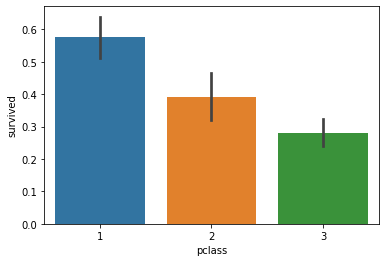

In [43]:
sns.barplot(x= "pclass", y="survived", data = train)

print("퍼스트 승객 생존률:", train["survived"][train["pclass"]==1].value_counts(normalize=True)[1]*100)

print("비즈니스 승객 생존률:", train["survived"][train["pclass"]==2].value_counts(normalize=True)[1]*100)

print("이코노미 승객 생존률:", train["survived"][train["pclass"]==3].value_counts(normalize=True)[1]*100)

배후자 0명인 사람의 생존률: 33.33333333333333
배후자 1명인 사람의 생존률: 53.153153153153156
배후자 2명인 사람의 생존률: 43.333333333333336


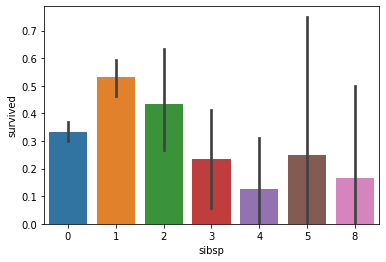

In [44]:
sns.barplot(x= "sibsp", y="survived", data = train)

print("배후자 0명인 사람의 생존률:", train["survived"][train["sibsp"]==0].value_counts(normalize=True)[1]*100)

print("배후자 1명인 사람의 생존률:", train["survived"][train["sibsp"]==1].value_counts(normalize=True)[1]*100)

print("배후자 2명인 사람의 생존률:", train["survived"][train["sibsp"]==2].value_counts(normalize=True)[1]*100)

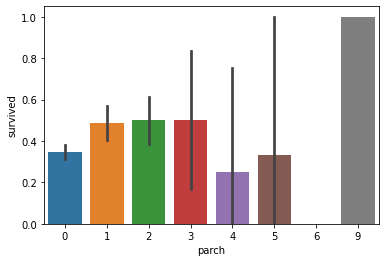

In [45]:
sns.barplot(x="parch", y="survived", data=train)
plt.show()

In [46]:
train['sub_age'] = train['age'].map(lambda x: x//10)
test['sub_age'] = test['age'].map(lambda x: x//10)
train.head()

,passengerid,survived,pclass,name,gender,age,sibsp,parch,ticket,fare,embarked,designation,ticket_number,fare_mean_by_pclass,survived_by_pclass,len_sibsp_by_pclass,len_parch_by_pclass,sub_age
0,0,0,2,"Wheeler, Mr. Edwin Frederick""""",male,28.0,0,0,SC/PARIS 2159,12.8750,S,11,2159,20.388036,0.391753,4,4,2.0
1,1,0,3,"Henry, Miss. Delia",female,28.0,0,0,382649,7.7500,Q,21,382649,13.566363,0.280808,7,8,2.0
2,2,1,1,"Hays, Mrs. Charles Melville (Clara Jennings Gr...",female,52.0,1,1,12749,93.5000,S,22,12749,83.745613,0.577093,4,4,5.0
3,3,1,3,"Andersson, Mr. August Edvard (""Wennerstrom"")",male,27.0,0,0,350043,7.7958,S,11,350043,13.566363,0.280808,7,8,2.0
4,4,0,2,"Hold, Mr. Stephen",male,44.0,1,0,26707,26.0000,S,11,26707,20.388036,0.391753,4,4,4.0


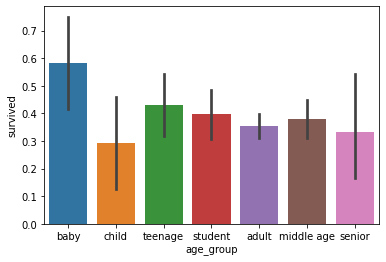

In [47]:
bins = [0,5,10,18,22,35,60, np.inf]
labels = ['baby','child', 'teenage', 'student', 'adult','middle age','senior']
train['age_group'] = pd.cut(train['age'],bins,labels= labels)
test['age_group'] = pd.cut(test['age'],bins,labels=labels)

sns.barplot(x="age_group",y="survived", data=train)
plt.show()

In [48]:
age_group_mapping = {
    'baby' : 1,
    'child' : 2,
    'teenage' : 3,
    'student' : 4,
    'adult' : 5,
    'middle age' : 6,
    'senior' : 7
}

train['age_group'] = train['age_group'].map(age_group_mapping)
test['age_group'] = test['age_group'].map(age_group_mapping)

In [49]:
train.head()

,passengerid,survived,pclass,name,gender,age,sibsp,parch,ticket,fare,embarked,designation,ticket_number,fare_mean_by_pclass,survived_by_pclass,len_sibsp_by_pclass,len_parch_by_pclass,sub_age,age_group
0,0,0,2,"Wheeler, Mr. Edwin Frederick""""",male,28.0,0,0,SC/PARIS 2159,12.8750,S,11,2159,20.388036,0.391753,4,4,2.0,5
1,1,0,3,"Henry, Miss. Delia",female,28.0,0,0,382649,7.7500,Q,21,382649,13.566363,0.280808,7,8,2.0,5
2,2,1,1,"Hays, Mrs. Charles Melville (Clara Jennings Gr...",female,52.0,1,1,12749,93.5000,S,22,12749,83.745613,0.577093,4,4,5.0,6
3,3,1,3,"Andersson, Mr. August Edvard (""Wennerstrom"")",male,27.0,0,0,350043,7.7958,S,11,350043,13.566363,0.280808,7,8,2.0,5
4,4,0,2,"Hold, Mr. Stephen",male,44.0,1,0,26707,26.0000,S,11,26707,20.388036,0.391753,4,4,4.0,6


In [50]:
train

,passengerid,survived,pclass,name,gender,age,sibsp,parch,ticket,fare,embarked,designation,ticket_number,fare_mean_by_pclass,survived_by_pclass,len_sibsp_by_pclass,len_parch_by_pclass,sub_age,age_group
0,0,0,2,"Wheeler, Mr. Edwin Frederick""""",male,28.0,0,0,SC/PARIS 2159,12.8750,S,11,2159,20.388036,0.391753,4,4,2.0,5
1,1,0,3,"Henry, Miss. Delia",female,28.0,0,0,382649,7.7500,Q,21,382649,13.566363,0.280808,7,8,2.0,5
2,2,1,1,"Hays, Mrs. Charles Melville (Clara Jennings Gr...",female,52.0,1,1,12749,93.5000,S,22,12749,83.745613,0.577093,4,4,5.0,6
3,3,1,3,"Andersson, Mr. August Edvard (""Wennerstrom"")",male,27.0,0,0,350043,7.7958,S,11,350043,13.566363,0.280808,7,8,2.0,5
4,4,0,2,"Hold, Mr. Stephen",male,44.0,1,0,26707,26.0000,S,11,26707,20.388036,0.391753,4,4,4.0,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
911,911,0,3,"Thomas, Mr. Charles P",male,28.0,1,0,2621,6.4375,C,11,2621,13.566363,0.280808,7,8,2.0,5
912,912,0,3,"Cacic, Mr. Jego Grga",male,18.0,0,0,315091,8.6625,S,11,315091,13.566363,0.280808,7,8,1.0,3
913,913,0,2,"Pengelly, Mr. Frederick William",male,19.0,0,0,28665,10.5000,S,11,28665,20.388036,0.391753,4,4,1.0,4
914,914,1,3,"Mullens, Miss. Katherine ""Katie""",female,28.0,0,0,35852,7.7333,Q,21,35852,13.566363,0.280808,7,8,2.0,5


In [51]:
train.shape, test.shape

((916, 19), (393, 18))

In [52]:
train['fare'].max()

512.3292

In [53]:
gender_mapping = {'male': 0, "female": 1}

train["gender"] = train["gender"].map(gender_mapping)
test["gender"] = test["gender"].map(gender_mapping)

In [54]:
train.head()

,passengerid,survived,pclass,name,gender,age,sibsp,parch,ticket,fare,embarked,designation,ticket_number,fare_mean_by_pclass,survived_by_pclass,len_sibsp_by_pclass,len_parch_by_pclass,sub_age,age_group
0,0,0,2,"Wheeler, Mr. Edwin Frederick""""",0,28.0,0,0,SC/PARIS 2159,12.8750,S,11,2159,20.388036,0.391753,4,4,2.0,5
1,1,0,3,"Henry, Miss. Delia",1,28.0,0,0,382649,7.7500,Q,21,382649,13.566363,0.280808,7,8,2.0,5
2,2,1,1,"Hays, Mrs. Charles Melville (Clara Jennings Gr...",1,52.0,1,1,12749,93.5000,S,22,12749,83.745613,0.577093,4,4,5.0,6
3,3,1,3,"Andersson, Mr. August Edvard (""Wennerstrom"")",0,27.0,0,0,350043,7.7958,S,11,350043,13.566363,0.280808,7,8,2.0,5
4,4,0,2,"Hold, Mr. Stephen",0,44.0,1,0,26707,26.0000,S,11,26707,20.388036,0.391753,4,4,4.0,6


In [55]:
embarked_mapping = {"S": 1, "C": 2, "Q": 3 }

train["embarked"] = train["embarked"].map(embarked_mapping)
test["embarked"] =test["embarked"].map(embarked_mapping)

In [56]:
train.head()

,passengerid,survived,pclass,name,gender,age,sibsp,parch,ticket,fare,embarked,designation,ticket_number,fare_mean_by_pclass,survived_by_pclass,len_sibsp_by_pclass,len_parch_by_pclass,sub_age,age_group
0,0,0,2,"Wheeler, Mr. Edwin Frederick""""",0,28.0,0,0,SC/PARIS 2159,12.8750,1,11,2159,20.388036,0.391753,4,4,2.0,5
1,1,0,3,"Henry, Miss. Delia",1,28.0,0,0,382649,7.7500,3,21,382649,13.566363,0.280808,7,8,2.0,5
2,2,1,1,"Hays, Mrs. Charles Melville (Clara Jennings Gr...",1,52.0,1,1,12749,93.5000,1,22,12749,83.745613,0.577093,4,4,5.0,6
3,3,1,3,"Andersson, Mr. August Edvard (""Wennerstrom"")",0,27.0,0,0,350043,7.7958,1,11,350043,13.566363,0.280808,7,8,2.0,5
4,4,0,2,"Hold, Mr. Stephen",0,44.0,1,0,26707,26.0000,1,11,26707,20.388036,0.391753,4,4,4.0,6


### Remove columes

In [57]:
train = train.drop(['name'], axis=1)
test = test.drop(['name'], axis=1)

In [58]:
train = train.drop(['age'], axis=1)
test = test.drop(['age'], axis=1)

In [59]:
train = train.drop(['ticket'], axis=1)
test = test.drop(['ticket'], axis=1)

In [60]:
train.head()

,passengerid,survived,pclass,gender,sibsp,parch,fare,embarked,designation,ticket_number,fare_mean_by_pclass,survived_by_pclass,len_sibsp_by_pclass,len_parch_by_pclass,sub_age,age_group
0,0,0,2,0,0,0,12.8750,1,11,2159,20.388036,0.391753,4,4,2.0,5
1,1,0,3,1,0,0,7.7500,3,21,382649,13.566363,0.280808,7,8,2.0,5
2,2,1,1,1,1,1,93.5000,1,22,12749,83.745613,0.577093,4,4,5.0,6
3,3,1,3,0,0,0,7.7958,1,11,350043,13.566363,0.280808,7,8,2.0,5
4,4,0,2,0,1,0,26.0000,1,11,26707,20.388036,0.391753,4,4,4.0,6


### Model

In [61]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

pred = train.drop(['survived', 'passengerid'], axis=1)
target = train['survived']
x_train, x_valid, y_train, y_valid = train_test_split(pred, target, test_size=0.2)

In [62]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 732 entries, 890 to 693
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   pclass               732 non-null    category
 1   gender               732 non-null    category
 2   sibsp                732 non-null    int64   
 3   parch                732 non-null    int64   
 4   fare                 732 non-null    float64 
 5   embarked             732 non-null    category
 6   designation          732 non-null    int64   
 7   ticket_number        732 non-null    int32   
 8   fare_mean_by_pclass  732 non-null    float64 
 9   survived_by_pclass   732 non-null    float64 
 10  len_sibsp_by_pclass  732 non-null    int64   
 11  len_parch_by_pclass  732 non-null    int64   
 12  sub_age              732 non-null    float64 
 13  age_group            732 non-null    category
dtypes: category(4), float64(4), int32(1), int64(5)
memory usage: 63.6 KB


### DecisionTree

In [63]:
train.head()

,passengerid,survived,pclass,gender,sibsp,parch,fare,embarked,designation,ticket_number,fare_mean_by_pclass,survived_by_pclass,len_sibsp_by_pclass,len_parch_by_pclass,sub_age,age_group
0,0,0,2,0,0,0,12.8750,1,11,2159,20.388036,0.391753,4,4,2.0,5
1,1,0,3,1,0,0,7.7500,3,21,382649,13.566363,0.280808,7,8,2.0,5
2,2,1,1,1,1,1,93.5000,1,22,12749,83.745613,0.577093,4,4,5.0,6
3,3,1,3,0,0,0,7.7958,1,11,350043,13.566363,0.280808,7,8,2.0,5
4,4,0,2,0,1,0,26.0000,1,11,26707,20.388036,0.391753,4,4,4.0,6


In [64]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier

decisiontree = DecisionTreeClassifier()

decisiontree.fit(x_train, y_train)

y_pred = decisiontree.predict(x_valid)

acc_decisiontree = accuracy_score(y_pred, y_valid)

acc_decisiontree

0.8152173913043478

In [65]:
# 가우시안 Naitive Bayes

from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

gaussian = GaussianNB()
gaussian.fit(x_train, y_train)
y_pred = gaussian.predict(x_valid)

acc_gaussian = accuracy_score(y_pred, y_valid)
acc_gaussian

0.6521739130434783

In [66]:
from sklearn.ensemble import RandomForestClassifier

randomforest = RandomForestClassifier()

randomforest.fit(x_train, y_train)

y_pred = randomforest.predict(x_valid)

acc_randomforest = accuracy_score(y_pred, y_valid)

acc_randomforest

0.8315217391304348

In [67]:
# Logistic Regression

from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(x_train, y_train)
y_pred = logreg.predict(x_valid)
acc_logreg = accuracy_score(y_pred,y_valid)
acc_logreg


0.6086956521739131

In [68]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(x_train, y_train)
y_pred = svc.predict(x_valid)
acc_svc = accuracy_score(y_pred, y_valid)
acc_svc

0.6086956521739131

In [69]:
# Linear SVC
from sklearn.svm import LinearSVC

linear_svc = LinearSVC()
linear_svc.fit(x_train, y_train)

y_pred = linear_svc.predict(x_valid)

acc_linear_svc = accuracy_score(y_pred, y_valid)
acc_linear_svc

/usr/local/lib/python3.8/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


0.41847826086956524

In [70]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(x_train, y_train)

y_pred = knn.predict(x_valid)

acc_knn = accuracy_score(y_pred, y_valid)
print(acc_knn)

0.7010869565217391


In [71]:
from sklearn.linear_model import SGDClassifier

sgd = SGDClassifier()
sgd.fit(x_train, y_train)

y_pred = sgd.predict(x_valid)

acc_sgd = accuracy_score(y_pred, y_valid)
print(acc_sgd)

0.6141304347826086


In [72]:
from sklearn.ensemble import GradientBoostingClassifier

gbk = GradientBoostingClassifier()
gbk.fit(x_train, y_train)

y_pred = gbk.predict(x_valid)

acc_gbk = accuracy_score(y_pred, y_valid)
print(acc_gbk)

0.8532608695652174


In [73]:
from sklearn.linear_model import Perceptron

perceptron = Perceptron()
perceptron.fit(x_train, y_train)

y_pred = perceptron.predict(x_valid)

acc_perceptron = accuracy_score(y_pred, y_valid)
acc_perceptron

0.6141304347826086

In [76]:
models = pd.DataFrame({
    'Model' : ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 'Linear SVC', 
              'Decision Tree', 'Stochastic Gradient Descent', 'Gradient Boosting Classifier'],
    'Score': [acc_svc, acc_knn, acc_logreg, 
              acc_randomforest, acc_gaussian, acc_perceptron,acc_linear_svc, acc_decisiontree,
              acc_sgd, acc_gbk]})
models.sort_values(by='Score', ascending=False)

,Model,Score
9,Gradient Boosting Classifier,0.853261
3,Random Forest,0.831522
7,Decision Tree,0.815217
1,KNN,0.701087
4,Naive Bayes,0.652174
5,Perceptron,0.614130
8,Stochastic Gradient Descent,0.614130
0,Support Vector Machines,0.608696
2,Logistic Regression,0.608696
6,Linear SVC,0.418478


In [75]:
from sklearn.dummy import DummyClassifier

dummy = DummyClassifier(strategy='most_frequent')
dummy.fit(x_train,y_train)
pred_dummy = dummy.predict(x_valid)